### Proyecto Data Science 


Contamos con un informe donde se muestra los delitos denunciados en la ciudad de Buenos Aires durante el año 2021, en el cual clasifica fecha, dia, franja (Horario),zona, tipo de delito, cantidad de delitos. Un analisis, para poder comprarar la zona mas caliente (peligrosa), y los tipo de delitos que ocurren alli. Esto sumando que se pueden tomar decisiones politicas sobre seguridad, en dias y horarios mas problematicos.

                                                  fuente: https://data.buenosaires.gob.ar/dataset/

Presentacion del Dataset (Delitos 2021)

In [22]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_delito = pd.read_csv('delitos_2021.csv', sep=";")
df_delitob = df_delito

df_delito.head()

,id-mapa,anio,mes,dia,fecha,franja,tipo,subtipo,uso_armas,barrio,comuna,latitud,longitud,cantidad
0,LC-2021-1000090,2021,Enero,Viernes,01/01/2021,0,Lesiones,Siniestro Vial,NaN,Villa Lugano,8.0,-34,672422,2
1,LC-2021-1000306,2021,Enero,Viernes,01/01/2021,7,Lesiones,Siniestro Vial,NaN,NaN,0.0,20,20,1
2,LC-2021-1000361,2021,Enero,Viernes,01/01/2021,10,Lesiones,Siniestro Vial,NaN,San Telmo,1.0,-34,621941,1
3,LC-2021-1000449,2021,Enero,Viernes,01/01/2021,6,Lesiones,Siniestro Vial,NaN,Boca,4.0,-34,637012,1
4,LC-2021-1000572,2021,Enero,Viernes,01/01/2021,10,Lesiones,Siniestro Vial,NaN,Boca,4.0,-34,637213,1


#### Muestra de cantidad de registros y columnas.

In [23]:
df_delito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88567 entries, 0 to 88566
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id-mapa    88567 non-null  object 
 1   anio       88567 non-null  int64  
 2   mes        88567 non-null  object 
 3   dia        88567 non-null  object 
 4   fecha      88567 non-null  object 
 5   franja     88567 non-null  int64  
 6   tipo       88567 non-null  object 
 7   subtipo    16321 non-null  object 
 8   uso_armas  8472 non-null   object 
 9   barrio     87390 non-null  object 
 10  comuna     87907 non-null  float64
 11  latitud    88567 non-null  int64  
 12  longitud   88567 non-null  int64  
 13  cantidad   88567 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 9.5+ MB


In [24]:
df_delito.shape

(88567, 14)

#### Convertir la columna id-mapa y se convierte en indice

In [25]:
df_delito.set_index('id-mapa', drop = True, inplace = True)
df_delito

,anio,mes,dia,fecha,franja,tipo,subtipo,uso_armas,barrio,comuna,latitud,longitud,cantidad
id-mapa,,,,,,,,,,,,,
LC-2021-1000090,2021,Enero,Viernes,01/01/2021,0,Lesiones,Siniestro Vial,NaN,Villa Lugano,8.0,-34,672422,2
LC-2021-1000306,2021,Enero,Viernes,01/01/2021,7,Lesiones,Siniestro Vial,NaN,NaN,0.0,20,20,1
LC-2021-1000361,2021,Enero,Viernes,01/01/2021,10,Lesiones,Siniestro Vial,NaN,San Telmo,1.0,-34,621941,1
LC-2021-1000449,2021,Enero,Viernes,01/01/2021,6,Lesiones,Siniestro Vial,NaN,Boca,4.0,-34,637012,1
LC-2021-1000572,2021,Enero,Viernes,01/01/2021,10,Lesiones,Siniestro Vial,NaN,Boca,4.0,-34,637213,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
RH-2021-3111653,2021,Diciembre,Viernes,31/12/2021,19,Robo (con violencia),NaN,NaN,San Telmo,1.0,-34,618627,1
RH-2021-3111702,2021,Diciembre,Viernes,31/12/2021,2,Hurto (sin violencia),NaN,NaN,Recoleta,2.0,-34,597475,1
RH-2021-3111754,2021,Diciembre,Viernes,31/12/2021,12,Robo (con violencia),NaN,NaN,Colegiales,13.0,-34,574402,2


#### Verificación de Nulos

In [26]:
df_delito.isnull().sum()

anio             0
mes              0
dia              0
fecha            0
franja           0
tipo             0
subtipo      72246
uso_armas    80095
barrio        1177
comuna         660
latitud          0
longitud         0
cantidad         0
dtype: int64

#### Verificacion de Duplicados

In [13]:
df_delito.duplicated()

id-mapa
LC-2021-1000090    False
LC-2021-1000306    False
LC-2021-1000361    False
LC-2021-1000449    False
LC-2021-1000572    False
                   ...  
RH-2021-3111653    False
RH-2021-3111702    False
RH-2021-3111754    False
RH-2021-3111781    False
RH-2021-3112295    False
Length: 88567, dtype: bool

<AxesSubplot:>

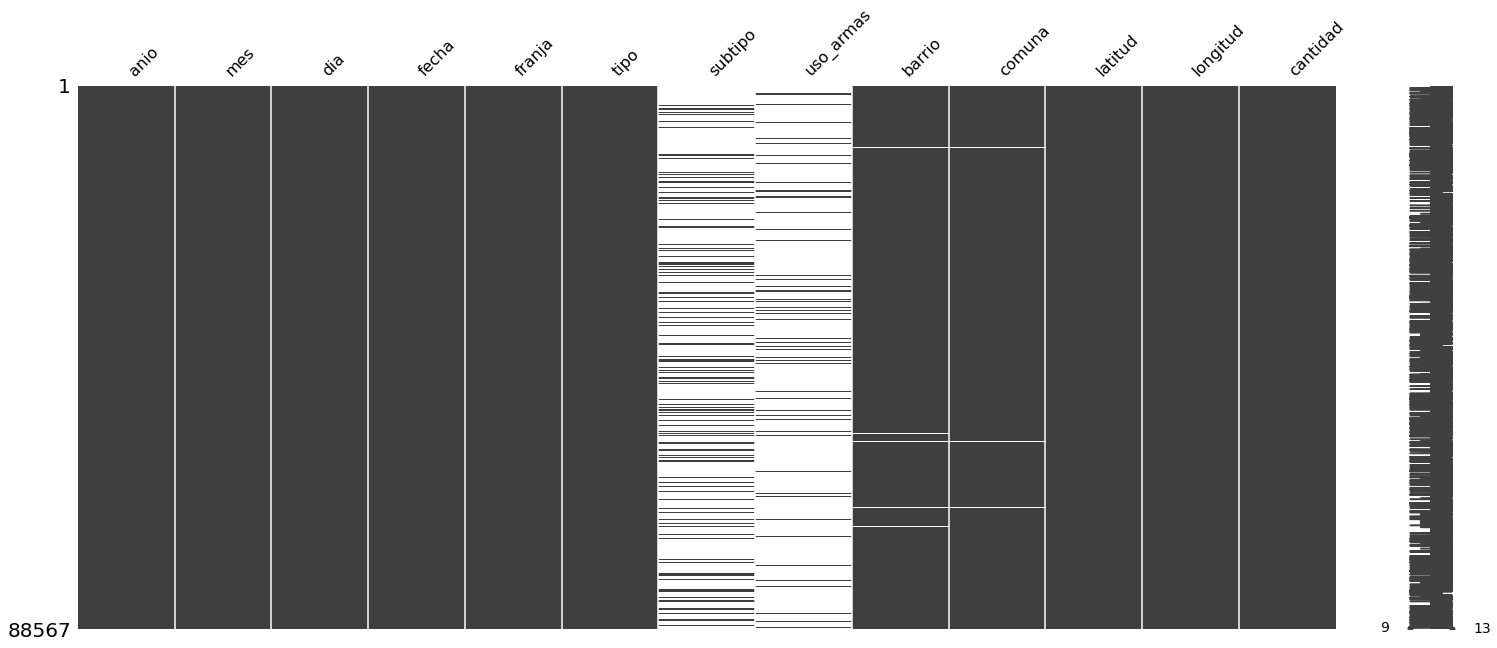

In [27]:
import missingno as msno
msno.matrix(df_delito)

#### Eliminación de Columnas que tiene muchos nulos, los cuales al tener muchisima cantidad de datos no van a ser relevantes en las conclusiones, las columnas subtipo y uso_armas, presentan el mayor numero de datos nulos o no presentan, por tal motivo se procede a la eliminacion de los mismo.

In [28]:
del df_delito['subtipo']
del df_delito['uso_armas']

In [29]:
df_delito.head()

,anio,mes,dia,fecha,franja,tipo,barrio,comuna,latitud,longitud,cantidad
id-mapa,,,,,,,,,,,
LC-2021-1000090,2021,Enero,Viernes,01/01/2021,0,Lesiones,Villa Lugano,8.0,-34,672422,2
LC-2021-1000306,2021,Enero,Viernes,01/01/2021,7,Lesiones,NaN,0.0,20,20,1
LC-2021-1000361,2021,Enero,Viernes,01/01/2021,10,Lesiones,San Telmo,1.0,-34,621941,1
LC-2021-1000449,2021,Enero,Viernes,01/01/2021,6,Lesiones,Boca,4.0,-34,637012,1
LC-2021-1000572,2021,Enero,Viernes,01/01/2021,10,Lesiones,Boca,4.0,-34,637213,1


#### Definir la Columna Date y Confirmar que sean todos los datos del 2021

In [30]:
df_delito.anio.unique()

array([2021], dtype=int64)

#### Separamos los datos por dia y mes, para poder realizar un analisis mas preciso sobre los dias de la semana y los meses donde se presenten mas altos delitos

In [42]:
dias_columna = pd.to_datetime(df_delito['fecha'], format = '%d/%m/%Y')

In [43]:
df_delito['dias'] = dias_columna.dt.day
df_delito['mes'] = dias_columna.dt.month

In [44]:
df_delito.head()

,anio,mes,dia,fecha,franja,tipo,barrio,comuna,latitud,longitud,cantidad,dias
id-mapa,,,,,,,,,,,,
LC-2021-1000090,2021,1,Viernes,01/01/2021,0,Lesiones,Villa Lugano,8.0,-34,672422,2,1
LC-2021-1000361,2021,1,Viernes,01/01/2021,10,Lesiones,San Telmo,1.0,-34,621941,1,1
LC-2021-1000449,2021,1,Viernes,01/01/2021,6,Lesiones,Boca,4.0,-34,637012,1,1
LC-2021-1000572,2021,1,Viernes,01/01/2021,10,Lesiones,Boca,4.0,-34,637213,1,1
LC-2021-1000613,2021,1,Viernes,01/01/2021,16,Lesiones,Floresta,10.0,-34,63001,2,1


In [31]:
df_delito.isnull().sum()

anio           0
mes            0
dia            0
fecha          0
franja         0
tipo           0
barrio      1177
comuna       660
latitud        0
longitud       0
cantidad       0
dtype: int64

#### Eliminacion de valores Faltantes

In [32]:
df_delito.dropna(how = 'any', inplace =  True)

In [50]:
df_delito.isnull().sum()

anio        0
mes         0
dia         0
fecha       0
franja      0
tipo        0
barrio      0
comuna      0
latitud     0
longitud    0
cantidad    0
dias        0
dtype: int64

anio        0
mes         0
dia         0
fecha       0
franja      0
tipo        0
barrio      0
comuna      0
latitud     0
longitud    0
cantidad    0
dtype: int64

## **Analisis de los datos**

 ## Introducción

### Contexto Empresarial
La ciudad Autonoma de Buenos Aires, tiene un incremento de delitos en la ciudad. El dataset cuenta con datos sobre ubicacion, fecha, año, ademas de tener tipo de delito, si se uso armas o tiene implicado algun elemento en el mismo. 

### Problemas comerciales
Crear visualizaciones que proporcion datos que sirvan para relevar las zonas donde se originan mas delitos, y asi tomar acciones de seguridad policial.

### Contexto Analitico

Desde un archivo csv, que contiene detalles sobre delitos realizados en la ciudad de buenos aires, con fecha y franja horario,  ubicacion geografica del delito, tipo de delito, si se utilizaron armas o algun elemento contudente para realizar el robo. 

1-. Cantidad de Robos Mensuales
2-. Cantidad de Robos por Franja Horaria

Se muestran las siguientes Columnas:

1. - id-mapa = Es el id de la ubicacion en el mapa de ciudad.
2. - anio = Es el año del delito.
3. - mes = Es el mes del delito.
4. - dia = Del delito.
5. - fecha = Es la fecha completa del delito.
6. - franja = Es la franja horaria donde se realizo el delito.
7. - tipo = Caracteristicas del delito (homicidio, lesiones, robo o hurto).
8. - subtipo = Donde se origino el delito (sinietro vial, etc).
9. - uso_armas = Si hubo uso de algun elemento en el delito (armas, cuchillos, etc).
10. - barrio = Lugar donde ocurrio el delito.
11. - comuna = Comuna donde ocurrio el delito.
12. - latitud = Ubicación por coordenas de donde fue el delito.
13. - cantidad = Cantidad de delitos (generalmente es uno, pero puede ser que se hicieron varios en el mismo lugar).

In [49]:
df_delito.describe()

,anio,mes,franja,comuna,latitud,longitud,cantidad,dias
count,87390.0,87390.000000,87390.000000,87390.000000,87390.0,8.739000e+04,87390.000000,87390.000000
mean,2021.0,6.712953,13.223378,7.583499,-34.0,6.422321e+05,1.184140,15.595423
std,0.0,3.528773,6.101975,4.530570,0.0,2.263241e+06,0.667158,8.773102
min,2021.0,1.000000,0.000000,1.000000,-34.0,6.000000e+00,1.000000,1.000000
25%,2021.0,3.000000,9.000000,4.000000,-34.0,5.828970e+05,1.000000,8.000000
50%,2021.0,7.000000,14.000000,7.000000,-34.0,6.084905e+05,1.000000,16.000000
75%,2021.0,10.000000,18.000000,12.000000,-34.0,6.312952e+05,1.000000,23.000000
max,2021.0,12.000000,23.000000,15.000000,-34.0,6.905031e+07,10.000000,31.000000


#### Por los datos se podria decir queel 50 % de los delitos se cometen entre las 09.00 horas y las 19.00 hs.

### Horarios de Delitos

Text(0, 0.5, 'Cantidad de Delitos')

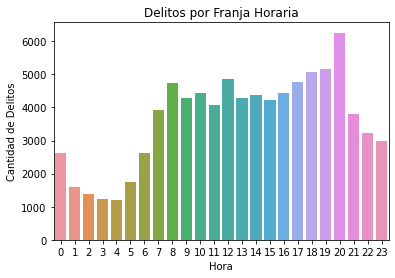

In [130]:
df_delito3 = df_delito.groupby('franja').size()
df_delito3.index
df_delito3.values
sns.barplot(x=df_delito3.index, y=df_delito3.values)
plt.title('Delitos por Franja Horaria')
plt.xlabel('Hora')
plt.ylabel('Cantidad de Delitos')

### Delitos por Día de la Semana

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Domingo'),
  Text(1, 0, 'Jueves'),
  Text(2, 0, 'Martes'),
  Text(3, 0, 'Miercoles'),
  Text(4, 0, 'Sabado'),
  Text(5, 0, 'Viernes'),
  Text(6, 0, 'Lunes')])

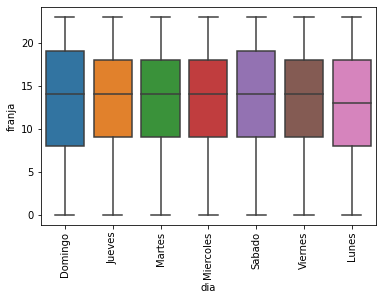

In [67]:
plt.subplots()
group = df_delito.groupby(by = 'dia').agg({'franja' : 'median'}).sort_values(by = 'franja', ascending = False)
order = group.index
sns.boxplot(data = df_delito, x = 'dia', y = 'franja', order = order)
plt.xticks(rotation = 90)

##### Los casos de delitos ocurren mayormente los dias viernes, sabados y domingos donde se registran la mayor cantidad de casos.

### Cantidad de Delitos Mensuales

Text(0, 0.5, 'Cantidad de Delitos')

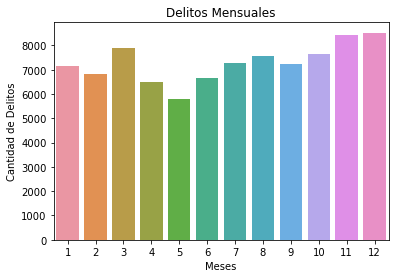

In [79]:
df_delito3 = df_delito.groupby('mes').size()
df_delito3.index
df_delito3.values
sns.barplot(x=df_delito3.index, y=df_delito3.values)
plt.title('Delitos Mensuales')
plt.xlabel('Meses')
plt.ylabel('Cantidad de Delitos')

#### Los meses donde se detecta mas cantidad de delitos son los meses de Marzo, Noviembre y Diciembre.

### Analisis de Delitos por Barrios

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 [Text(0, 0, 'Agronomía'),
  Text(1, 0, 'Almagro'),
  Text(2, 0, 'Balvanera'),
  Text(3, 0, 'Barracas'),
  Text(4, 0, 'Belgrano'),
  Text(5, 0, 'Boca'),
  Text(6, 0, 'Boedo'),
  Text(7, 0, 'Caballito'),
  Text(8, 0, 'Chacarita'),
  Text(9, 0, 'Coghlan'),
  Text(10, 0, 'Colegiales'),
  Text(11, 0, 'Constitución'),
  Text(12, 0, 'Flores'),
  Text(13, 0, 'Floresta'),
  Text(14, 0, 'Liniers'),
  Text(15, 0, 'Mataderos'),
  Text(16, 0, 'Monserrat'),
  Text(17, 0, 'Monte Castro'),
  Text(18, 0, 'Nueva Pompeya'),
  Text(19, 0, 'Nueva pompeya'),
  Text(20, 0, 'Nuñez'),
  Text(21, 0, 'Palermo'),
  Text(22, 0, 'Parque Avellaneda'),
  Text(23, 0, 'Parque Chacabuco'),
  Text(24, 0, 'Parque Chas'),
  Text(25, 0, 'Parque Patricios'),
  Text(26, 0, 'Paternal'),
  Text(27, 0, 'Puerto

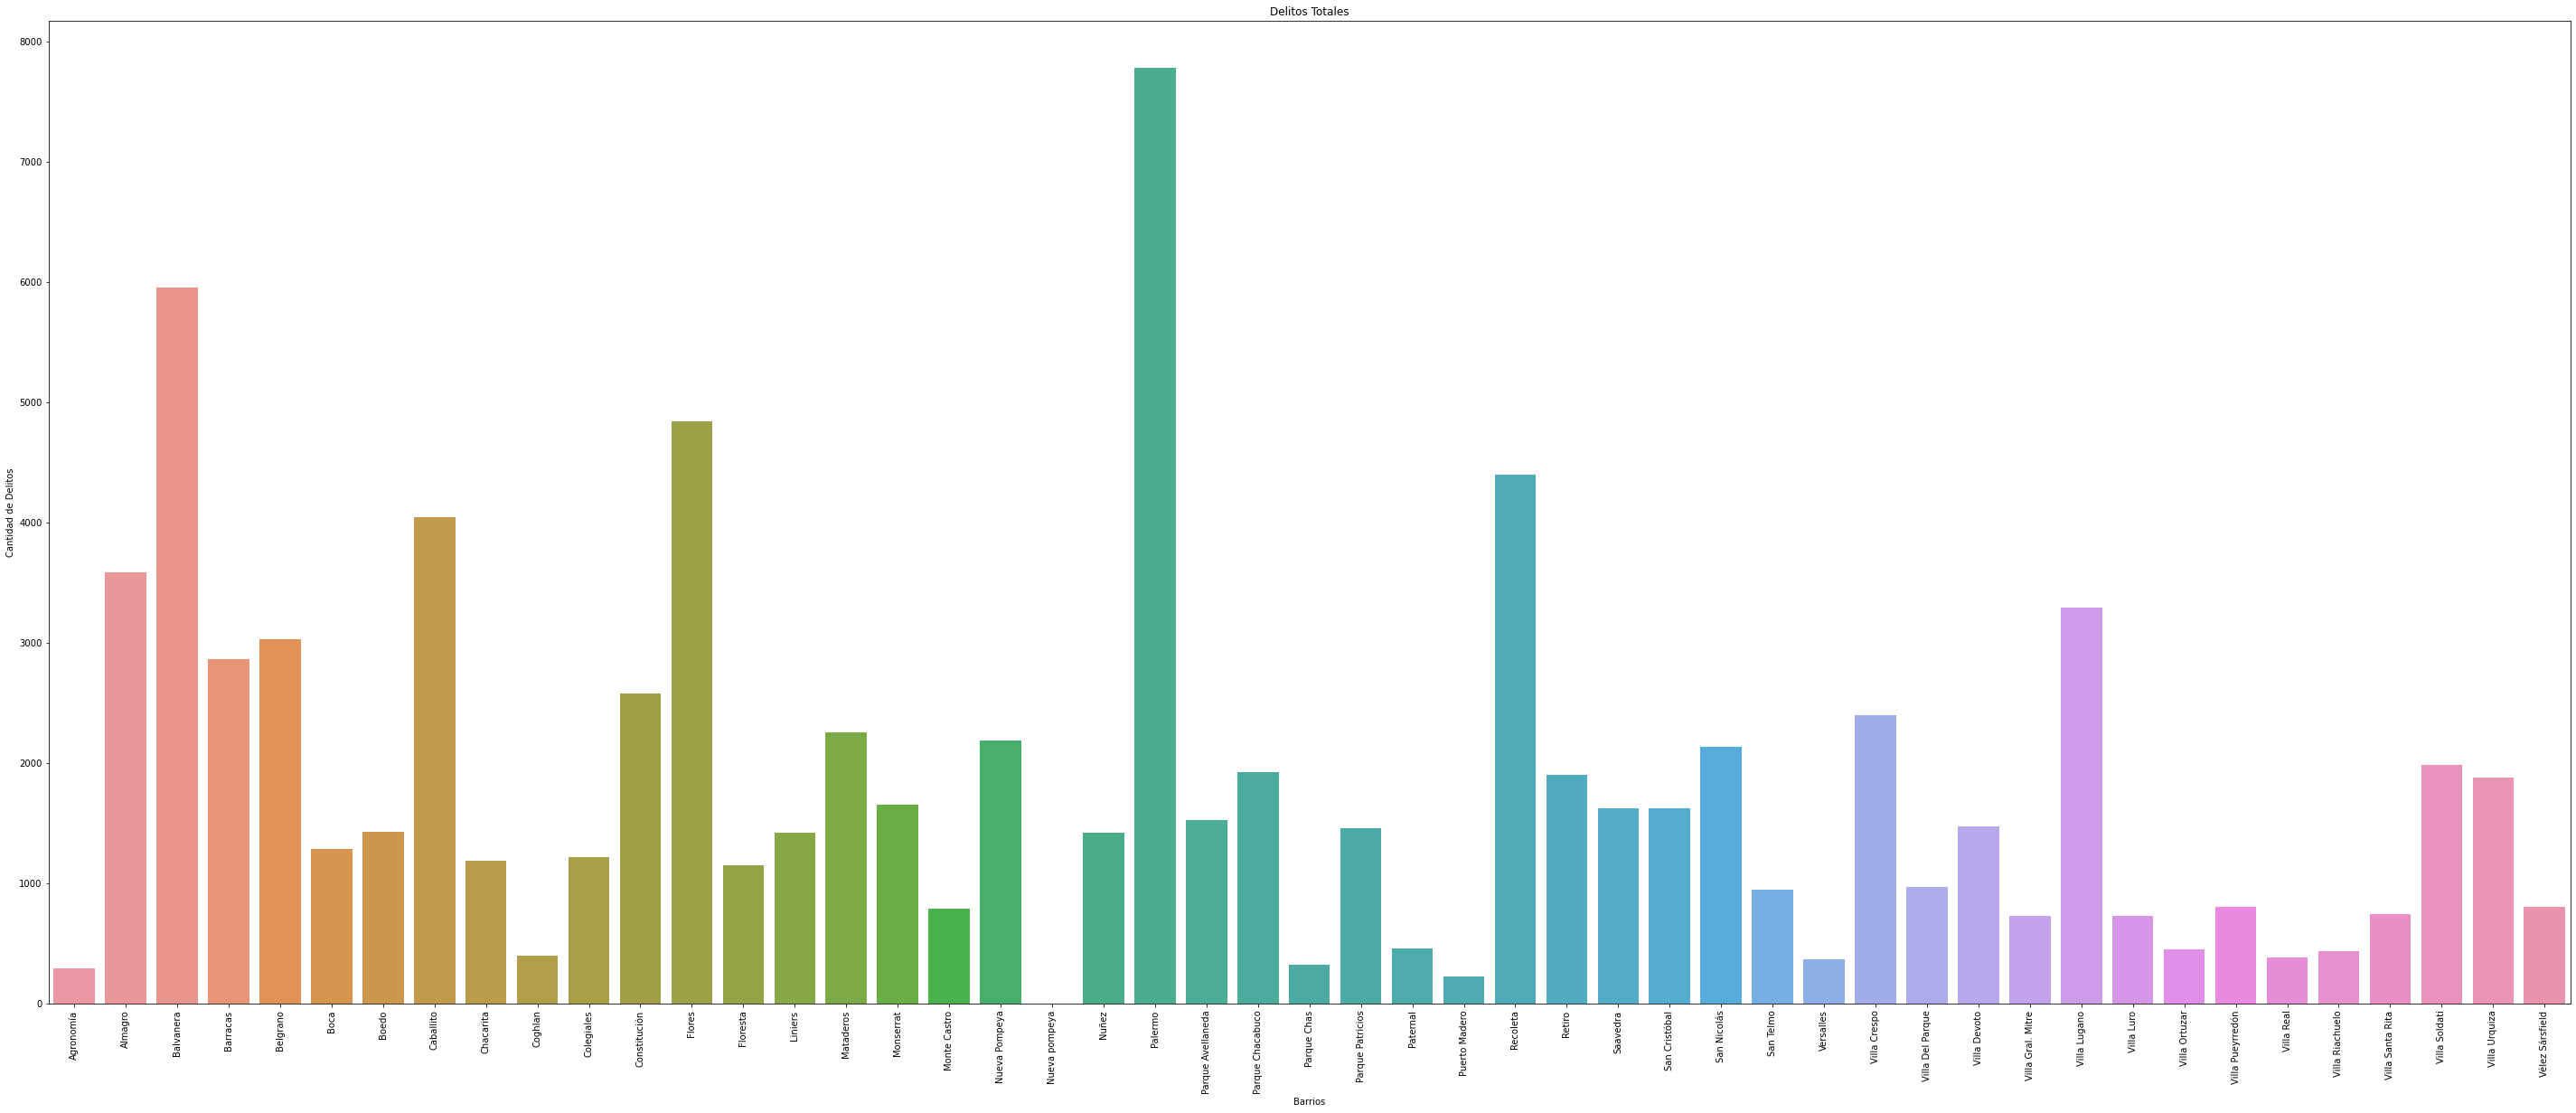

In [149]:
df_delito3 = df_delito.groupby('barrio').size()
df_delito3.index
df_delito3.values
fig = plt.figure(figsize = (50, 20))
sns.barplot(x=df_delito3.index, y=df_delito3.values, capsize=4)
plt.title('Delitos Totales')
plt.xlabel('Barrios')
plt.ylabel('Cantidad de Delitos')
plt.xticks(rotation=90)


#### El barrio que mas delitos registra es el barrio de Palermo y Balmacera

### Caracteristica de los Delitos

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Homicidio'),
  Text(1, 0, 'Hurto (sin violencia)'),
  Text(2, 0, 'Lesiones'),
  Text(3, 0, 'Robo (con violencia)')])

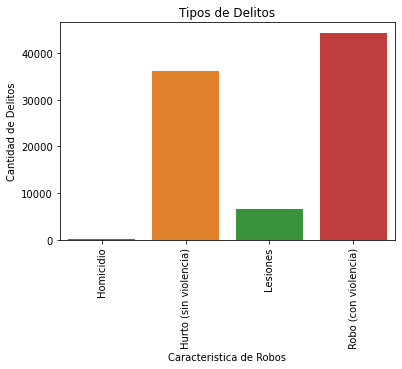

In [137]:
df_delito3 = df_delito.groupby('tipo').size()
df_delito3.index
df_delito3.values
sns.barplot(x=df_delito3.index, y=df_delito3.values)
plt.title('Tipos de Delitos')
plt.xlabel('Caracteristica de Robos')
plt.ylabel('Cantidad de Delitos')
plt.xticks(rotation=90)

#### La mayoria de los echos delitos son ocasionados por robos con violencia, y le siguen los de hurto sin violencia. Muy poco porcentaje son los que en ocacion de robo, sigue de homicidio.

### Agrupacion de los datos

#### Creacion de Variables Ficticias, ya que contamos con datos categoricos de variables independientes (con las variables ficticias limitamos a valor especificos de 0 y 1)

In [75]:
X = delito[['tipo']]
X = pd.get_dummies(data=X, drop_first=True) 
X.head()

,tipo_Hurto (sin violencia),tipo_Lesiones,tipo_Robo (con violencia)
id-mapa,,,
LC-2021-1000090,0,1,0
LC-2021-1000361,0,1,0
LC-2021-1000449,0,1,0
LC-2021-1000572,0,1,0
LC-2021-1000613,0,1,0


In [77]:
Y = delito['cantidad']

#### Creacion de un conjunto de Datos de entrenemiento y prueba (Dividir)

In [78]:
from sklearn.model_selection import train_test_split
### test de entrenamiento de 70/30
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(61173, 3)
(26217, 3)
(61173,)
(26217,)


#### Metrica del Algoritmo de Regresion

In [34]:
from sklearn.linear_model import LinearRegression
### Creacion del modelo
model = LinearRegression()
### Ajuste del Modelo
model.fit(X_train,y_train)
print(model.intercept_)

1.0310077519379957


#### Coeficiente de Variables

In [35]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
tipo_Hurto (sin violencia),0.160572
tipo_Lesiones,0.130418
tipo_Robo (con violencia),0.153412


#### Modelo Predictivo

In [37]:
predictions = model.predict(X_test)
predictions

array([1.19157961, 1.19157961, 1.18441997, ..., 1.19157961, 1.19157961,
       1.161426  ])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cantidad'>

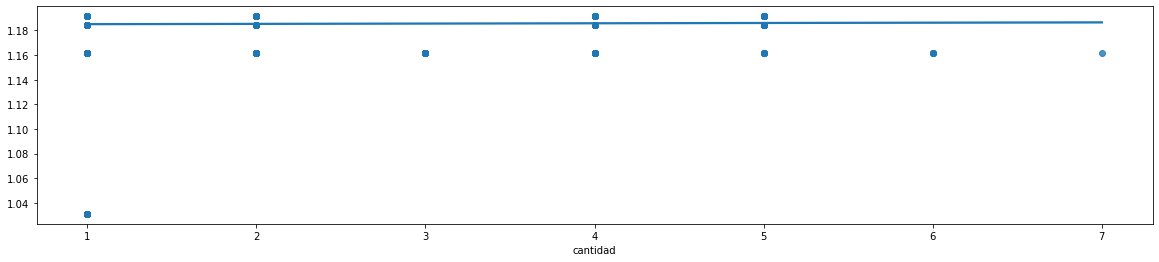

In [38]:
sns.regplot(y_test,predictions)

#### Metrica R2

In [39]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
r2 = r2_score(y_test,y_pred)
print(r2)

0.00018051191666779154


#### Valores Rsquare

In [40]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:               cantidad   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     5.141
Date:                Tue, 06 Jun 2023   Prob (F-statistic):            0.00149
Time:                        16:36:24   Log-Likelihood:                -63234.
No. Observations:               61996   AIC:                         1.265e+05
Df Residuals:                   61992   BIC:                         1.265e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               